In [1]:
import numpy as np
import matplotlib.pyplot as plt

Cavity mode https://www.sciencedirect.com/science/article/abs/pii/S092442471731275X

 Starting from one complex gausssian beam parameter at the waist, after 1 cavity round trip, we should obtain the same 
 parameter. We look for a waist that satisfies such condition


In [2]:
# def ABCD matrix for a round trip starting from the short arm center
def abcd1(l1,l2,l3,r):
    m1 = np.mat([[1,l1/2],[0,1]])
    m2 = np.mat([[1,0],[-2/r,1]])
    m3 = np.mat([[1,l3+2*l2],[0,1]])
    m4 = np.mat([[1,0],[-2/r,1]])
    m5 = np.mat([[1,l1/2],[0,1]])
    return m1*m2*m3*m4*m5

In [3]:
def abcd2(l1,l2,l3,r):
    m1 = np.mat([[1,l2+l3/2],[0,1]])
    m2 = np.mat([[1,0],[-2/r,1]])
    m3 = np.mat([[1,l1],[0,1]])
    m4 = np.mat([[1,0],[-2/r,1]])
    m5 = np.mat([[1,l2+l3/2],[0,1]])
    return m1*m2*m3*m4*m5

In [150]:
# beam diameter that satisfies the equation
# corrected with a negative sign, seems like A should be (A+D)/2 if they are not equal
def Find_waist(abcd,wl):
    return np.sqrt(-wl*abcd[0,1]/np.pi/np.sqrt(1-((abcd[0,0]+abcd[1,1])/2)**2))

In [5]:
# parameters used in the paper
l1 = 31e-3
l2 = 47e-3
l3 = 56e-3
r = 30e-3
wl = 5.25e-6

In [6]:
matrix1 = abcd1(l1,l2,l3,r)
matrix2 = abcd2(l1,l2,l3,r)

In [64]:
d1 = d(matrix1,wl)
d2 = d(matrix2,wl)

In [65]:
# this agrees with the paper
print(d1,d2)

5.080385725309812e-05 0.00028286390590810315


we try this for the green cavity

In [9]:
# parameters used in the paper
l1 = 110e-3
l2 = 136e-3
l3 = 138e-3
r = 100e-3
wl = 1.087e-6

In [10]:
matrix1 = abcd1(l1,l2,l3,r)
matrix2 = abcd2(l1,l2,l3,r)

In [11]:
matrix1

matrix([[-3.80e-01, -6.90e-03],
        [ 1.24e+02, -3.80e-01]])

In [12]:
matrix2

matrix([[-0.38  , -0.2139],
        [ 4.    , -0.38  ]])

In [13]:
d1 = d(matrix1[0,0],matrix1[0,1],wl)
d2 = d(matrix2[0,0],matrix2[0,1],wl)

In [14]:
print(d1,d2)

5.080385725309812e-05 0.0002828639059081031


The paper wrongly quote this as the waist, actually it is the diameter.
Note that this is calculated without crystal and bending angle. Note that Konrad's thesis quoted 26.4 micron waist, but actual cavity wants about 2x larger.

### Ideal focusing parameter

### Critical phase matching
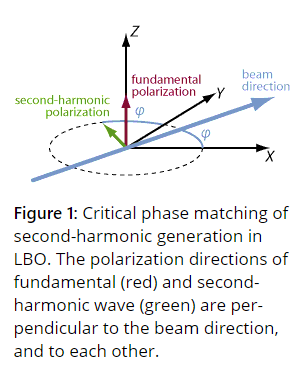

For critical phase matching, the crystal chosen is birefringent. Depending on the angle in which the fundamental mde enters the crystal, the refractive index for SHG beam changes. At specific angles, the phase of fundamental mode and SH mode matches exactly. 
 [source:https://www.rp-photonics.com/critical_phase_matching.html]

### Non-critical phase matching
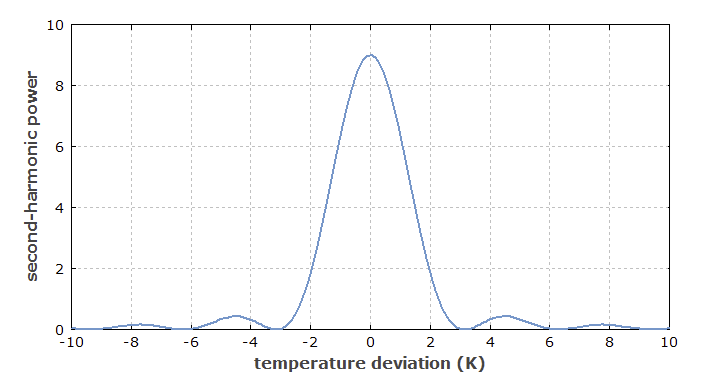

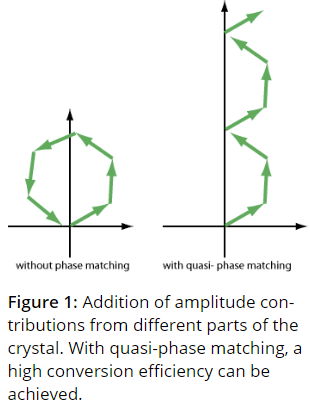

Non critical phase matching can be done through periodically poled crystals. Because quasi phase matching accepts a wider range of input beam angle, this allows for tighter focusing than critical phase matching. Conversion efficiency is temperature dependent, since temperature affects refractive index and thus the phase matching.

[source: https://www.rp-photonics.com/quasi_phase_matching.html]

### Focusing parameter

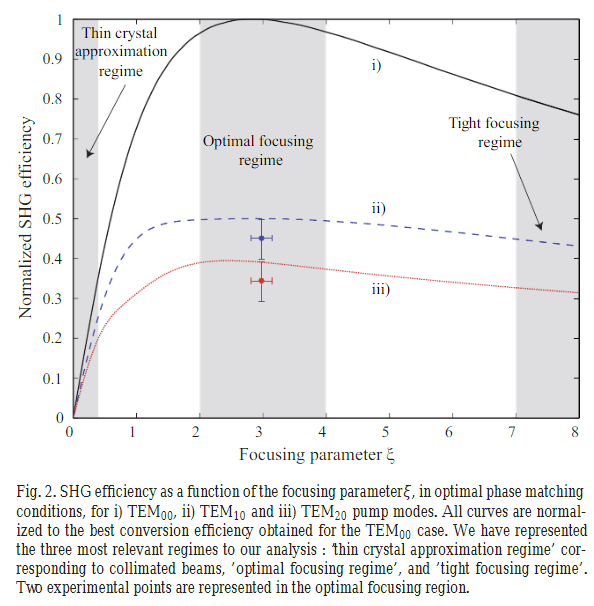

The optimal focusing parameter for a given length of non-linear crystal is determined by the trade off between optimal intensity, length and the degree of the beam maintaining phase relation throughout the crystal. for type 1 crystal, the focusing parameter  is at 2.84 at 0 deg incidence. However the range in which in operates well are not stringent. 

We could test with a high focused beam single pass beam at the crystal to verify that the crystal still works, or if the temperature is correct.

Source: https://www.researchgate.net/publication/26298013_Spatial_mode_discrimination_using_second_harmonic_generation

In [15]:
def ZR(w0,n,wl):
    return np.pi*w0**2*n/wl

def Focus_Param(l,zr):
    return l/2/zr
    

In [16]:
fp_list = []
w0_scan = np.linspace(20e-6,60e-6,100)
for w0 in w0_scan:
    zr = ZR(w0,1.747,1.087e-6)
    fp = Focus_Param(20e-3,zr)
    fp_list.append(fp)

In [17]:
max(fp_list)

4.951385894129658

([<matplotlib.axis.YTick at 0x1a013b8c400>,
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

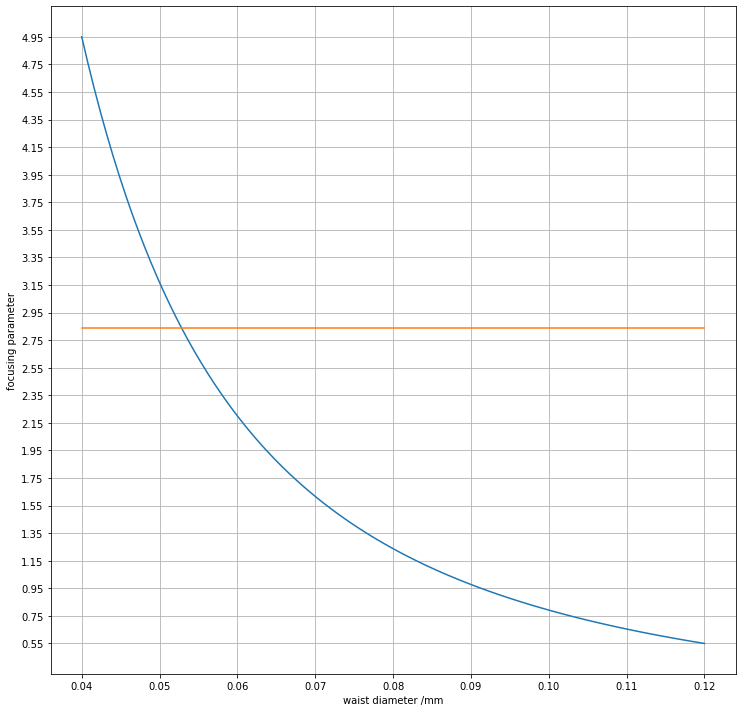

In [18]:
plt.figure(figsize=[10,10])
plt.grid()
plt.plot(w0_scan*2/1e-3,fp_list)
plt.plot(w0_scan*2/1e-3,np.ones(100)*2.84)
plt.xlabel('waist diameter /mm')
plt.tight_layout()
plt.ylabel('focusing parameter')
plt.yticks(np.arange(min(fp_list),max(fp_list),step = 0.2))

## Transfer matrices

define some common transfer matrices to calculate beam parameters

In [176]:
def Propagate(distance,n=1):
    # note this is valid for any refractive index
    return np.mat([[1,distance/n],[0,1]])

def Refraction(n1,n2):
    return np.mat([[n2/n1,0],[0,n1/n2]])

def Reflection(radius ,axis = 'h',fold = 0):
    if axis == 'h':
        ABCD = np.mat([[1,0],[-2/radius/np.cos(fold/2*np.pi/180),1]])
    if axis == 'v':
        ABCD = np.mat([[1,0],[-2/radius*np.cos(fold/2*np.pi/180),1]])
#     else:
#         print('axis w.r.t reflection is horizontal')
    return ABCD

def Thin_lens(focal_length):
    return np.mat([[1,0],[-1/focal_length,1]])

def Gaussian(R = None,n = 1, wl = None, waist = None, z = None, position = False):
    if not position:
        q = 1/(1/R - 1j*wl/(np.pi*n*waist**2))
    else:
        zr = np.pi*waist**2/wl
        q = z + 1j*zr
    return q

def Position_from_waist(q):
    return np.real(q)

def Waist(q,wl,n):
    inv_q = 1/q
    if np.imag(inv_q) <= 0:
        waist0 = np.sqrt(-wl/(np.pi*n*np.imag(inv_q)))
    else:
        print('No waist! Check Parameters')
    return waist0

def Gaussian_transfer(q,ABCD):
    A = ABCD[0,0]
    B = ABCD[0,1]
    C = ABCD[1,0]
    D = ABCD[1,1]
    q2 = (A*q + B)/(C*q + D)
    return q2

def Cavity_round_trip(lc = 20e-3, l1 = 138e-3,l2=136e-3,l3=110e-3,r=100e-3,fold = 23,start='short',n_air = 1, n_crystal = 1.747):
    if start == 'short':
        m1 = Propagate(lc/2,n = n_crystal)
#         m2_h = Refraction(n_crystal,n_air)
        m3 = Propagate((l3-lc)/2)
        m4_h = Reflection(radius =r, fold = fold)
        m4_v = Reflection(radius =r, axis = 'v',fold = fold)
        m5 = Propagate(l2+l1+l2)
        m6_h = Reflection(radius =r, fold = fold)
        m6_v = Reflection(radius =r, axis = 'v',fold = fold)
        m7 = Propagate((l3-lc)/2)
#         m8_h = Refraction(n_air,n_crystal)
        m9 = Propagate(lc/2,n = n_crystal)
        
        m_h = m9*m7*m6_h*m5*m4_h*m3*m1
        m_v = m9*m7*m6_v*m5*m4_v*m3*m1
        
    else:
        m1 = Propagate(l1/2+l2)
        m2_h = Reflection(radius =r, fold = fold)
        m2_v = Reflection(radius =r, axis = 'v',fold = fold)
        m3 = Propagate((l3-lc)/2)
#         m4_h = Refraction(n_air,n_crystal)
        m5 = Propagate(lc,n = n_crystal)
#         m6_h = Refraction(n_crystal,n_air)
        m7 = Propagate((l3-lc)/2)
        m8_h = Reflection(radius =r, fold = fold)
        m8_v = Reflection(radius =r, axis = 'v',fold = fold)
        m9 = Propagate(l3/2+l2)
        
        m_h = m9*m8_h*m7*m5*m3*m2_h*m1
        m_v = m9*m8_v*m7*m5*m3*m2_v*m1
        
    return np.array([m_h,m_v])

def Beam_to_cavity(q_i,l_bef_f,focal,l_aft_f,l1,l2,l3,lc,radius,fold,n_air,n_crystal):
    m1 = Propagate(l_bef_f)
    m2 = Thin_lens(focal)
    m3 = Propagate(l_aft_f)
    m4 = Propagate(l1/2+l2)
    m5_h = Reflection(radius,fold = fold)
    m5_v = Reflection(radius,axis = 'v', fold=fold)
    m6 = Propagate((l1-lc)/2)
#     m7_h = Refraction(n_air, n_crystal)
    m8 = Propagate(lc/2,n=n_crystal)
    
    m_h = m8*m6*m5_h*m4*m3*m2*m1
    m_v = m8*m6*m5_v*m4*m3*m2*m1
    
    q_h = Gaussian_transfer(q_i,m_h)
    q_v = Gaussian_transfer(q_i,m_v)
    return np.array([q_h,q_v])

In [214]:
ABCD_s = Cavity_round_trip(start = 'short')
ABCD_l = Cavity_round_trip(start = 'long')

# ABCD_s = Cavity_round_trip(start = 'short',fold =0)
# ABCD_l = Cavity_round_trip(start = 'long',fold =0)

In [215]:
(ABCD_s[0][0,0]+ABCD_s[0][1,1])/2

-0.7754314091903398

In [216]:
(ABCD_s[1][0,0]+ABCD_s[1][1,1])/2

-1.0355125296518666

In [217]:
(ABCD_l[0][0,0]+ABCD_s[0][1,1])/2

-0.7855079617530026

In [218]:
(ABCD_l[1][0,0]+ABCD_s[1][1,1])/2

-1.0338980687108255

In [219]:
Find_waist(ABCD_s[0],wl)

4.0999941537464034e-05

In [220]:
Find_waist(ABCD_s[1],wl)

C:\Users\Jianhui\AppData\Local\Temp\ipykernel_25364\3449431049.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-wl*abcd[0,1]/np.pi/np.sqrt(1-((abcd[0,0]+abcd[1,1])/2)**2))


nan

In [221]:
Find_waist(ABCD_l[0],wl)

0.0003857302278214151

In [222]:
Find_waist(ABCD_l[1],wl)

C:\Users\Jianhui\AppData\Local\Temp\ipykernel_25364\3449431049.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-wl*abcd[0,1]/np.pi/np.sqrt(1-((abcd[0,0]+abcd[1,1])/2)**2))


nan

In [104]:
q_list750 = []
waist_list750 = []
pos_list750 = []
for focus_spot in focus_scan750:
    m1 = Propagate(0.1)
    m2 = Thin_lens(focus)
    m3 = Propagate(focus_spot)
    m4 = Propagate(0.138/2)
    m5 = Propagate(0.136)
    m6 = Reflection(0.1,axis = 'h',fold = 23)
    m7 = Propagate(0.045)
    m8 = Refraction(n_air,n_crystal)
    m9 = Propagate(0.01,n=n_crystal)
    matrix = m9*m8*m7*m6*m5*m4*m3*m2*m1
    q_f = Gaussian_transfer(q_i, matrix)
    q_list750.append(q_f)
    waist_list750.append(Waist(q_f,wl,n_air))
    pos_list750.append(Position_from_waist(q_f))
    

In [105]:
wl = 1.087e-6
n_air = 1
n_crystal = 1.747
waist_start = 1.6e-3/2

focus = 500e-3
focus_scan500 = np.linspace(focus-focus/2, focus + focus/2,100)
q_i = Gaussian(position = True, wl = wl, n= n_air, waist = waist_start, z = 100e-3)

In [106]:
q_list500 = []
waist_list500 = []
pos_list500 = []
for focus_spot in focus_scan500:
    m1 = Propagate(0.1)
    m2 = Thin_lens(focus)
    m3 = Propagate(focus_spot)
    m4 = Propagate(0.138/2)
    m5 = Propagate(0.136)
    m6 = Reflection(0.1,axis = 'h',fold = 23)
    m7 = Propagate(0.045)
    m8 = Refraction(n_air,n_crystal)
    m9 = Propagate(0.01,n=n_crystal)
    matrix = m9*m8*m7*m6*m5*m4*m3*m2*m1
    q_f = Gaussian_transfer(q_i, matrix)
    q_list500.append(q_f)
    waist_list500.append(Waist(q_f,wl,n_air))
    pos_list500.append(Position_from_waist(q_f))
    

In [140]:
wl = 1.087e-6
n_air = 1
n_crystal = 1.747
waist_start = 1.6e-3/2
l1 = 0.138
l2 = 0.136
l3 = 0.11
lc = 0.02
fold = 23
focus = 500e-3
radius = 0.1
n_air = 1
n_crystal = 1.747
focus_scan400 = np.linspace(focus-focus/2, focus + focus/2,100)
q_i = Gaussian(position = True, wl = wl, n= n_air, waist = waist_start, z = 100e-3)

In [141]:
q_list = []
waist_list_h = []
waist_list_v = []
pos_list400 = []
for focus_spot in focus_scan400:
    q_f_h = Beam_to_cavity(q_i,0.1,focus,focus_spot,l1,l2,l3,lc,radius,fold,n_air,n_crystal)[0]
    q_f_v = Beam_to_cavity(q_i,0.1,focus,focus_spot,l1,l2,l3,lc,radius,fold,n_air,n_crystal)[1]
    waist_list_h.append(Waist(q_f_h,wl,n_crystal))
    waist_list_v.append(Waist(q_f_v,wl,n_crystal))
#     pos_list400.append(Position_from_waist(q_f))
waist_list_h = np.array(waist_list_h)
waist_list_v = np.array(waist_list_v)

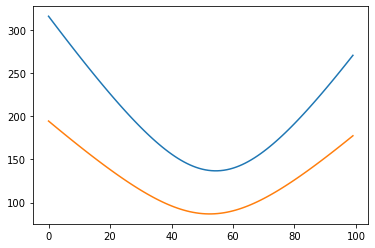

In [142]:
plt.plot(waist_list_h*2/1e-6)
plt.plot(waist_list_v*2/1e-6)

In [108]:
q_list400 = []
waist_list400 = []
pos_list400 = []
for focus_spot in focus_scan400:
    m1 = Propagate(0.1)
    m2 = Thin_lens(focus)
    m3 = Propagate(focus_spot)
    m4 = Propagate(0.138/2)
    m5 = Propagate(0.136)
    m6 = Reflection(0.1,axis = 'h',fold = 23)
    m7 = Propagate(0.045)
    m8 = Refraction(n_air,n_crystal)
    m9 = Propagate(0.01,n=n_crystal)
    matrix = m9*m8*m7*m6*m5*m4*m3*m2*m1
    q_f = Gaussian_transfer(q_i, matrix)
    q_list400.append(q_f)
    waist_list400.append(Waist(q_f,wl,n_air))
    pos_list400.append(Position_from_waist(q_f))
    

In [109]:
wl = 1.087e-6
n_air = 1
n_crystal = 1.747
waist_start = 1.6e-3/2

focus = 1000e-3
focus_scan1000 = np.linspace(focus-focus/2, focus + focus/2,100)
q_i = Gaussian(position = True, wl = wl, n= n_air, waist = waist_start, z = 100e-3)

In [110]:
q_list1000 = []
waist_list1000 = []
pos_list1000 = []
for focus_spot in focus_scan1000:
    m1 = Propagate(0.1)
    m2 = Thin_lens(focus)
    m3 = Propagate(focus_spot)
    m4 = Propagate(0.138/2)
    m5 = Propagate(0.136)
    m6 = Reflection(0.1,axis = 'h',fold = 23)
    m7 = Propagate(0.045)
    m8 = Refraction(n_air,n_crystal)
    m9 = Propagate(0.01,n=n_crystal)
    matrix = m9*m8*m7*m6*m5*m4*m3*m2*m1
    q_f = Gaussian_transfer(q_i, matrix)
    q_list1000.append(q_f)
    waist_list1000.append(Waist(q_f,wl,n_air))
    pos_list1000.append(Position_from_waist(q_f))
    

Text(0.5, 0, 'lens position from focus')

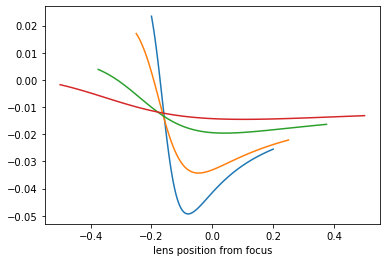

In [111]:
plt.plot(np.array(focus_scan400)-0.4,np.array(pos_list400))
plt.plot(np.array(focus_scan500)-0.5,np.array(pos_list500))
plt.plot(np.array(focus_scan750)-0.75,np.array(pos_list750))
plt.plot(np.array(focus_scan1000)-1,np.array(pos_list1000))

plt.xlabel('lens position from focus')

Text(0.5, 0, 'lens position from focus')

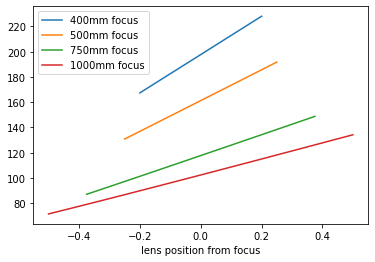

In [112]:
plt.plot(np.array(focus_scan400)-0.4,np.array(waist_list400)*1e6,label='400mm focus')
plt.plot(np.array(focus_scan500)-0.5,np.array(waist_list500)*1e6,label='500mm focus')
plt.plot(np.array(focus_scan750)-0.75,np.array(waist_list750)*1e6,label='750mm focus')
plt.plot(np.array(focus_scan1000)-1,np.array(waist_list1000)*1e6,label='1000mm focus')

plt.legend()
plt.xlabel('lens position from focus')

In [113]:
Position_from_waist(q_f)

-0.013156495706286816

In [114]:
Waist(q_f,wl,n_air)

0.00013422521887072558

-----

In [88]:
# def ABCD1(l1,l2,l3,r):
#     m1 = np.array([[1,l1/2],[0,1]])
#     m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m3 = np.array([[1,l3+2*l2],[0,1]])
#     m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m5 = np.array([[1,l1/2],[0,1]])
#     mul = np.matmul(m1,m2)
#     mul = np.matmul(mul,m3)
#     mul = np.matmul(mul,m4)
#     mul= np.matmul(mul,m5)
#     return mul
    

In [79]:
def ABCD1(l1,l2,l3,r):
    m1 = np.array([[1,l1/2],[0,1]])
    m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m3 = np.array([[1,l3+2*l2],[0,1]])
    m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m5 = np.array([[1,l1/2],[0,1]])
    mul = np.matmul(m4,m5)
    mul = np.matmul(m3,mul)
    mul = np.matmul(m2,mul)
    mul= np.matmul(m1,mul)
    return mul
    

In [80]:
# def ABCD2(l1,l2,l3,r):
#     m1 = np.array([[1,l2+l3/2],[0,1]])
#     m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m3 = np.array([[1,l1],[0,1]])
#     m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m5 = np.array([[1,l2+l3/2],[0,1]])
#     mul = np.matmul(m1,m2)
#     mul = np.matmul(mul,m3)
#     mul = np.matmul(mul,m4)
#     mul= np.matmul(mul,m5)
#     return mul   

In [80]:
def ABCD2(l1,l2,l3,r):
    m1 = np.array([[1,l2+l3/2],[0,1]])
    m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m3 = np.array([[1,l1],[0,1]])
    m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m5 = np.array([[1,l2+l3/2],[0,1]])
    mul = np.matmul(m4,m5)
    mul = np.matmul(m3,mul)
    mul = np.matmul(m2,mul)
    mul= np.matmul(m1,mul)
    return mul   

In [81]:
def d(a,b,wl):
    return np.sqrt(wl*b/np.pi/np.sqrt(1-a**2))

In [82]:
def gauss_prop(abcd,q_i):
    q_f = (abcd[0,0]*q_i + abcd[0,1])/(abcd[1,0]*q_i + abcd[1,1])
    return q_f

def w0(q):
    return np.sqrt(-1j*wl*q/np.pi)

def w2(inv_q):
    return np.sqrt(-wl/np.pi/n_c/np.imag(inv_q))

In [21]:
l1 = 110*1e-3
l2 = 135*1e-3
l3 = 138*1e-3
r = 100*1e-3
wl = 1.087e-3*1e-3
l_c = 20*1e-3
n_c = 1.747
w_i = 280e-3/2*1e-3

m1 = np.array([[1,l3/2],[0,1]])
m2 = np.array([[1,l2],[0,1]])
m3 = np.array([[1,0],[-2/r/np.cos(23*np.pi/180),1]])
m4 = np.array([[1,l1/2-l_c/2],[0,1]])
m5 = np.array([[1,0],[0,1/n_c]])
m6 = np.array([[1,l_c/2/n_c],[0,1]])

abcd = np.matmul(m1,m2)
abcd = np.matmul(abcd,m3)
abcd = np.matmul(abcd,m4)
abcd = np.matmul(abcd,m5)
abcd = np.matmul(abcd,m6)

In [22]:
abcd

array([[-3.43235034e+00,  8.71249646e-03],
       [-2.17272075e+01, -1.11617868e-01]])

In [38]:
l1 = 110*1e-3
l2 = 135*1e-3
l3 = 138*1e-3
r = 100*1e-3
wl = 1.087e-3*1e-3
l_c = 20*1e-3
n_c = 1.747
w_i = 280e-3/2*1e-3

m1 = np.mat([[1,l3/2],[0,1]])
m2 = np.mat([[1,l2],[0,1]])
m3 = np.mat([[1,0],[-2/r/np.cos(23*np.pi/180),1]])
m4 = np.mat([[1,l1/2-l_c/2],[0,1]])
m5 = np.mat([[1,0],[0,1/n_c]])
m6 = np.mat([[1,l_c/2/n_c],[0,1]])

# abcd = m1*m2*m3*m4*m5*m6
abcd = m6*m5*m4*m3*m2*m1

In [39]:
abcd

matrix([[ -0.04891419,   0.03829803],
        [-12.43686751,  -1.96471113]])

In [40]:
q_i = 1j*wl/np.pi/w_i**2

In [41]:
q_f = gauss_prop(abcd,q_i)

In [46]:
w_scan = np.linspace(0.3e-3,0.8e-3,1000)/2
q_list = []
R = []
for w_i in w_scan:
    q_i = 1j*np.pi*w_i**2/wl
    q_f = gauss_prop(abcd,q_i)
    inv_q = 1/q_f
    q_list.append(w2(inv_q)/1e-3*2)
    R.append(np.real(inv_q))
#     R.append(np.real(q_f))

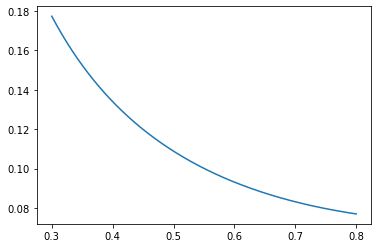

In [47]:
plt.plot(w_scan*2/1e-3,q_list)


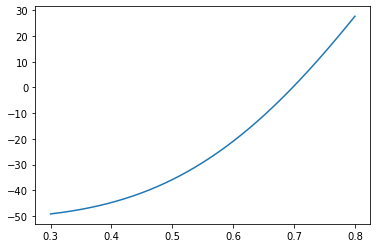

In [49]:
plt.plot(w_scan*2/1e-3,R)

In [45]:
w0(q_f)

(5.0059475866003127e-05-5.131223074900043e-06j)

In [91]:
# test params
l1 = 31e-3
l2 = 47e-3
l3 = 56e-3
r = 30e-3
wl = 5.47e-6

In [92]:
abcd1 = ABCD1(l1,l2,l3,r)
abcd2 = ABCD2(l1,l2,l3,r)

In [99]:
d1 = d(abcd1[0,0],abcd1[0,1],wl)
d2 = d(abcd2[0,0],abcd2[0,1],wl)

C:\Users\Jianhui\AppData\Local\Temp\ipykernel_27692\754505264.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wl*b/np.pi/np.sqrt(1-a**2))


In [100]:
d1

nan

In [101]:
d2

nan

In [102]:
print(d1*1000,',',d2*1000, 'μm')


nan , nan μm


In [97]:
# test params
l1 = 110e-3
l2 = 135e-3
l3 = 138e-3
r = 100e-3
wl = 1.087e-6

In [88]:
abcd1 = ABCD1(l1,l2,l3,r)
abcd2 = ABCD2(l1,l2,l3,r)

In [89]:
d1 = d(abcd1[0,0],abcd1[0,1],wl)
d2 = d(abcd2[0,0],abcd2[0,1],wl)

C:\Users\Jianhui\AppData\Local\Temp\ipykernel_27692\754505264.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wl*b/np.pi/np.sqrt(1-a**2))


In [90]:
print(d1*1000,',',d2*1000, 'μm')


nan , nan μm


In [112]:
d2

0.28261098621882896

In [43]:
a
ma1 = ABCD1(0.115,0.138,0.135,0.100)

In [73]:
ma1 = ABCD1(115,138,135,100)

In [74]:
ma1

array([[-0.067 , -8.0025],
       [ 0.1244, -0.067 ]])

In [44]:
ma1

array([[-6.7000e-02, -8.0025e-03],
       [ 1.2440e+02, -6.7000e-02]])

In [45]:
ma1[0,1]

-0.0080025

In [46]:
ma1[0,0]**2

0.0044890000000000225

In [77]:
d(ma1[0,0],ma1[0,1],5.26e-3)

0.04619886191392761

In [76]:
ma1 = ABCD1(31,47,56,30)

In [66]:
ma1

array([[-0.73333333, -0.86666667],
       [ 0.53333333, -0.73333333]])

In [49]:
m1 = np.array([[1,100/2],[0,1]])
m2 = np.array([[1,110/2],[0,1]])

In [14]:
np.dot(m1,m2)

array([[  1., 105.],
       [  0.,   1.]])

In [9]:
np.matmul(m1,m2)

array([[  1., 105.],
       [  0.,   1.]])